In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [26]:
import kagglehub
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")
print(path)

/root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [27]:
import os
files = os.listdir(path)
print(files)

['creditcard_2023.csv']


In [28]:
csv = os.path.join(path, "creditcard_2023.csv")
card_data = pd.read_csv(csv)
card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [29]:
card_data.shape

(568630, 31)

In [30]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [31]:
card_data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [32]:
card_data.drop('id',inplace=True,axis=1)

In [33]:
print(card_data.columns.to_list())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [34]:
sd = card_data.sample(frac=0.50, random_state=42)

In [35]:
sd.shape

(284315, 30)

In [36]:
X = sd.drop(columns=['Class'])
y = sd['Class']

In [37]:
print(X.columns.to_list())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42 )

In [41]:
cv = cross_val_score(rfc_model, X_train_scaled, y_train, cv=5, scoring='f1')
print("Cross-validation F1 scores:", cv)

Cross-validation F1 scores: [0.98503274 0.98446866 0.98632087 0.9842381  0.98459687]


In [42]:
rfc_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [43]:
pred = rfc_model.predict(X_test_scaled)

In [44]:
cl_rp = classification_report(y_test, pred)
print(cl_rp)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     28411
           1       1.00      0.97      0.99     28452

    accuracy                           0.99     56863
   macro avg       0.99      0.99      0.99     56863
weighted avg       0.99      0.99      0.99     56863



In [45]:
print("Training Accuracy:", rfc_model.score(X_train_scaled, y_train))
print("Test Accuracy:", rfc_model.score(X_test_scaled, y_test))

Training Accuracy: 0.9864235091359935
Test Accuracy: 0.9855793749890087


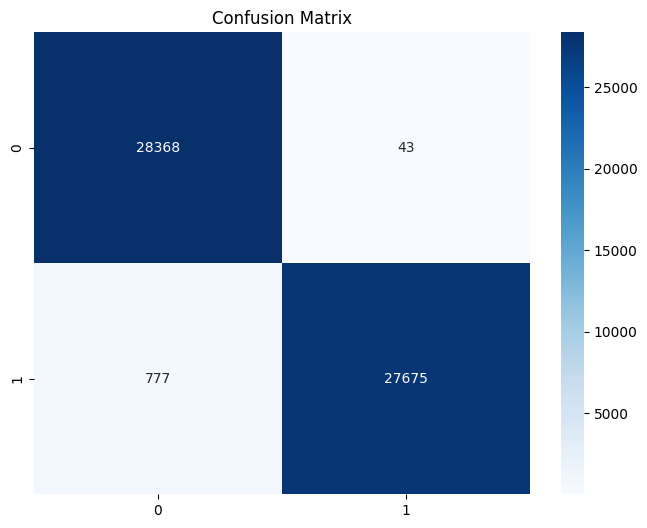

In [47]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
fea_imp = rfc_model.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns,'Importance': fea_imp})

In [51]:
feature_imp.head()

,Feature,Importance
0,V1,0.005610
1,V2,0.019651
2,V3,0.032936
3,V4,0.153085
4,V5,0.007585


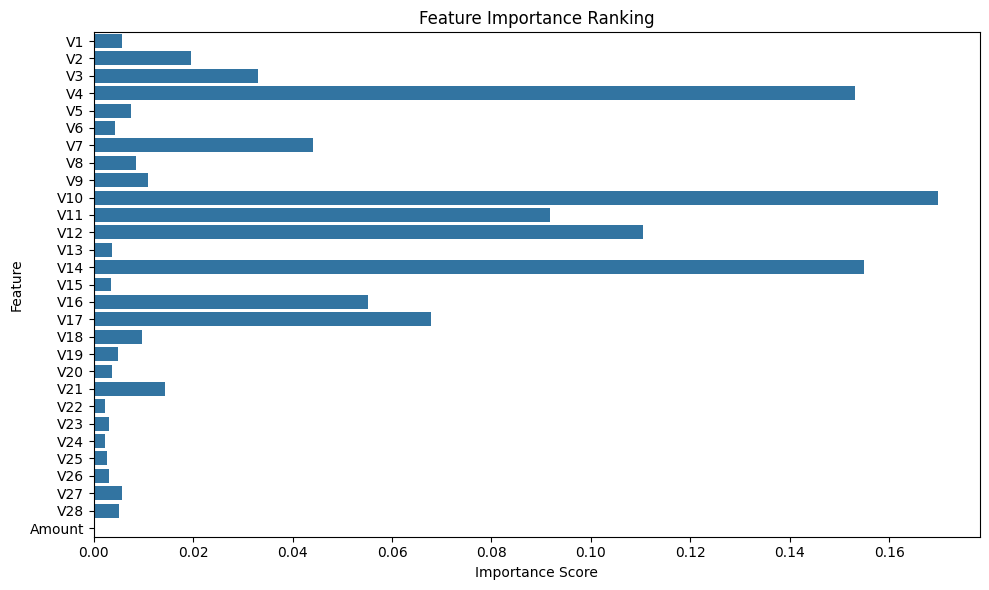

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp, x='Importance', y='Feature')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

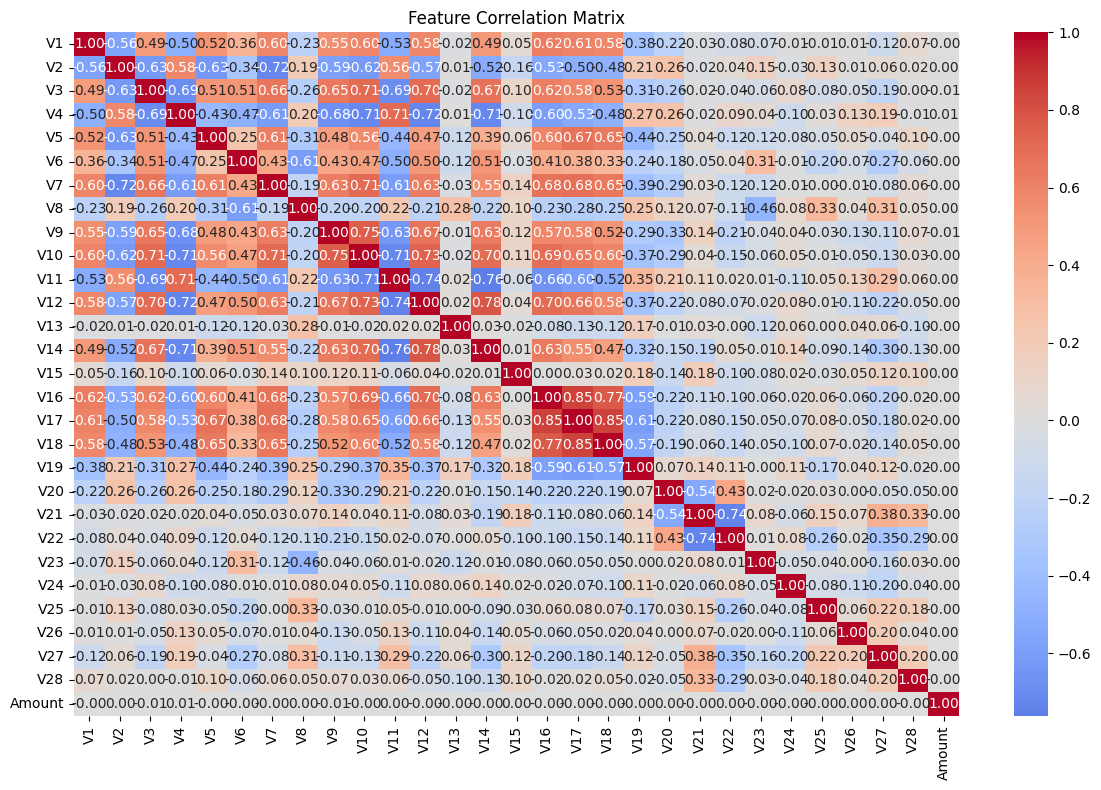

In [54]:
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [58]:
y_pred_proba = rfc_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

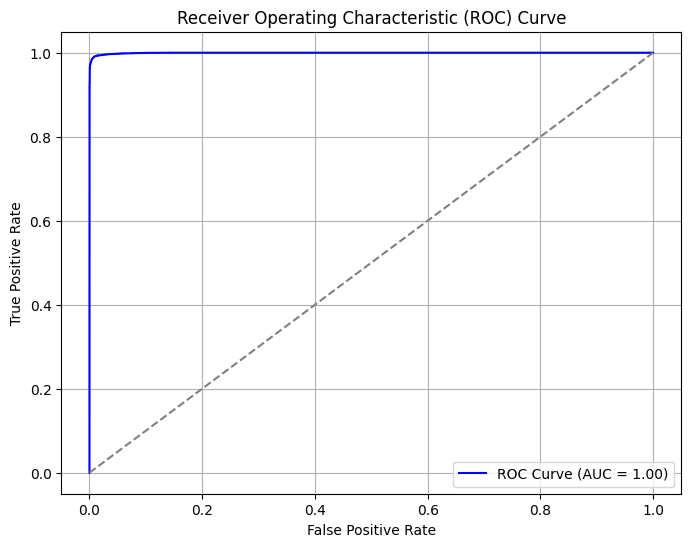

ROC AUC Score: 0.9995


In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")